**COMP3670 Assignment 6**
---

---


**PROGRAMMING SECTION (100%)**
---

For all of the following, program the solution yourself. Don't just call a library function that does the whole question for you, or you'll get zero (no, that doesn't mean you can't use any library functions, but it does mean that you have to show you understand how to compute the answer yourself).

**All written answers** should be between 50 and 500 words. If you can describe all the necessary information in 50 words, that's better. However, you'll only be graded on whether you describe the necessary ideas.


-----------

   **TASK 0.1:** You know the drill. Import Numpy and PyPlot. We're also going to generate a dataset.


-----------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #This is for 3d scatter plots.
import math
import random
from scipy.stats import multivariate_normal
import os
from matplotlib.pyplot import imread
np.random.seed(13579201)

k = 4
n = 8
m = 5000
D = np.zeros((m, n))
Y = np.zeros((m, k))
for ix in range(0, m):
    dpool = random.randint(0, 2**n)
    ypool = round(np.sqrt(dpool))
    for iy in range(n):
        if dpool >= 2**(D.shape[1] - iy - 1):
            D[ix, iy] = 1
            dpool -= 2**(D.shape[1] - iy - 1)
    for iy in range(Y.shape[1]):
        if ypool >= 2**(Y.shape[1] - iy - 1):
            reading = ((np.random.randn() + 0.3) > 0)
            Y[ix, iy - k] = 1 * reading
            ypool -= 2**(Y.shape[1] - iy - 1)

print(D)
print(Y)
print('Done')

[[1. 1. 0. ... 1. 1. 0.]
 [1. 0. 1. ... 0. 0. 1.]
 [0. 0. 1. ... 1. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 1. 1. 0.]]
[[0. 1. 0. 0.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 1. 1. 0.]
 [0. 0. 0. 1.]]
Done


PROGRAMMING EXERCISE 1  
-----------

Note that for all of the questions that follow, you may re-use any code from your previous assignments.

We're going to implement logistic regression with gradient descent in this first exercise.

It's much like linear regression, but we apply a sigmoid function to the output, which of course changes the gradient!

The point of logistic regression is to predict a label {0, 1} or a probability.

We're going to re-use the dataset from assignment 5 for this problem:

$D \in \mathbb{R}^{m \times n}$ together with $Y \in \mathbb{R}^{m \times k}$ is our dataset.

Our objective is to predict $Y$ given $D$, such that $s(D\theta) = Y$, where $s()$ is the same logistic or sigmoid function you used in assignment 4.

We're going to use logistic regression to predict a binary string!


---
   **TASK 1.1:** Complete the function $initialise(D, Y) = \theta$, which detects the dimensions of $D$ and $Y$ and generates $\theta$ of appropriate dimension, with random values appropriate for regression, such that the dimensions of $D\theta$ is the same as the dimensions of $Y$.

---


In [2]:
def initialise(D, Y):
    theta = None
    #YOUR CODE HERE
    n = D.shape[1]
    k = Y.shape[1]
    theta = np.random.randn(n, k)
    return theta

theta = initialise(D, Y)
print(theta)

[[-1.46324455 -1.26924189  0.93396733  0.13253038]
 [-1.28885751  0.46557764 -0.46288339  0.98809613]
 [ 0.2066009   0.34616549  1.06225896 -1.3799242 ]
 [ 1.04249092  0.94150181  0.05152024  0.4257031 ]
 [-0.03090498  0.49205263  0.08115006  1.84106664]
 [-0.39318174  0.7985905  -0.11816483 -1.31816408]
 [-0.39398598 -0.40184209 -1.70962103  0.83741018]
 [-0.79090677 -1.08767608  0.28673007 -0.15396604]]



---

**TASK 1.2:** Complete $s(Z) = sZ$, which accepts a matrix $Z$ and outputs $sZ$, where $sZ$ is just $Z$ with the sigmoid (or "logistic") function applied to every element.

You must do this without using a loop.

**HINT:** 
- Recall assignment 4, where you applied the sigmoid function in exactly the same manner.
- You might want to use np.vectorize(). You'll probably need to define a second function which accepts a single element and applies the sigmoid function to that element (this is how np.vectorize works).

---


In [3]:
def s(Z):
    sZ = None
    #YOUR CODE HERE
    def sig(x):
        return 1 / (1 + np.exp(-x))
    v_sig = np.vectorize(sig)
    sZ = v_sig(Z)
    return sZ

print((s(D@theta * 999999999)).astype('int'))

[[0 0 0 1]
 [0 0 1 1]
 [0 1 0 0]
 ...
 [0 0 0 1]
 [0 0 1 1]
 [0 1 0 1]]


C:\Users\xky\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


Recall assignment 4, where you implemented a neural network where the $X\theta^{[1]}$ had a sigmoid function applied to its output.

Thus the first layer was the function $s(X\theta^{[1]})$.

That first layer was performing logistic regression with mean squared error!

Now, for what follows you may choose any convex loss function you wish. For instance, you might:

1. Implement the mean squared loss function as you did in assignment 4 exercise 2 (this will only get you half marks).
2. Implement the cross-entropy loss (this is the most common loss function for logistic regression, and I recommend you implement this).
3. Implement anything else your heart desires, so long as it functions as a convex loss function for logistic regression!

Not sure what convex is? Then you must look this up. Convex means the loss function has only one global minimum!

Likewise with cross entropy loss; you need to research and understand this on your own. 

Cross entropy loss when $k = 1$ is computed as follows:

$\mathcal{L}(\theta) = -\frac{1}{m}\sum_{i=0}^m \left[y_i ln (s(d_i\theta)) + (1 - y_i) ln (1 - s(d_i\theta))\right] + \frac{\gamma}{2}\theta^T\theta$

... where $ln(z)$ is the natural logarithm of a scalar $z$.

When $k =1$, $s(d_i\theta)$ and $y_i$ are scalars. As $k > 1$, you'll need to modify the above loss function to work with vectors.

---

**TASK 1.3:** Complete the function $\mathcal{L}(\theta) = loss(D, \theta, Y) = l$, where $l$ is a scalar that represents the loss. That means $l$ is the sum of the $k$ losses (because we're simultaneously running $k$ regressions again).

You will get 50% for implementing the mean squared loss function you used in assignment 4 exercise 2, or 100% for implementing a different loss function (so long as it works).

Bear in mind you will need to compute $\frac{d \mathcal{L}(\theta)}{d \theta}$ for this loss function in order to complete the next question, so pick something you actually know how to compute the derivative of.

You must also include a form of regularisation such as $\gamma \theta^T \theta$, where $\gamma$ is a scalar chosen by you (I suggest something like 0.0001). When computing regularisation, remember that $k > 1$. 20% of your grade will be deducted for failing to implement a form of regularisation.

**HINT:** If implementing cross entropy loss, you'll need to account for taking the log of $0$.

---

In [4]:
def loss(D, theta, Y):
    l = None
    #YOUR CODE HERE
    k = Y.shape[1]
    m = Y.shape[0]
    sDT = s(D@theta)
    O = np.ones((m, k))
    A = np.log(sDT + 0.0001)
    A = Y.T@A * np.eye(k)
    B = np.log(O - sDT + 0.0001)
    B = (O - Y).T@B * np.eye(k)
    l = -np.sum((A + B)) / m + 0.0001 * np.sum(theta.T@theta * np.eye(k))
    return l

l = loss(D, theta, Y)
print(l)

4.118282014998032


---

**TASK 1.4:** Implement $gradient\_update(D, \theta, Y, \lambda) = \theta - \lambda \frac{d \mathcal{L}(\theta)}{d \theta} = \theta_{new}$, which updates $\theta$ using the gradient of the loss function you implemented above.

It must be the gradient of the loss function you implemented, not a different loss function.

$\lambda$ is the learning rate.

As above, if it's just the mean squared loss you will only be eligible for 50% of the grade, and 20% of your grade will be deducted for not including a form of regularisation.

---

In [5]:
def gradient_update(D, theta, Y, lam):
    theta_new = None
    #YOUR CODE HERE
    k = Y.shape[1]
    m = Y.shape[0]
    I = np.eye(k)
    sDT = s(D@theta)
    G = D.T @ (sDT - Y) / m + 0.0001 * np.sum(theta.T@theta * np.eye(k), 0)
    theta_new = theta - lam * G
    return theta_new

theta_new_test = gradient_update(D, theta, Y, 0.05)
print(theta_new_test)

[[-1.45070275 -1.26463164  0.92825181  0.12621629]
 [-1.27639509  0.45864721 -0.46216108  0.9804573 ]
 [ 0.21351927  0.34267797  1.05850077 -1.38176754]
 [ 1.04724729  0.93631311  0.04734129  0.41946221]
 [-0.02393131  0.48730651  0.07726166  1.83092429]
 [-0.38589765  0.79354493 -0.12132078 -1.32188065]
 [-0.38680119 -0.40410451 -1.70867064  0.82936137]
 [-0.78274685 -1.08822636  0.2825141  -0.16029732]]


---

**TASK 1.5:** Complete the function $predict(d, \theta) = s(d\theta) = y$, where $y \in \{0, 1\}^{(p \times k)}$ and $d \in \{0, 1\}^{(p \times n)}$ and $1 \ge p \ge m$.

Note, every element of the output must be an integer.

---

In [6]:
def predict(d, theta):
    y = None
    #YOUR CODE HERE
    y = s(d@theta)
    return y

print(predict(D[0:7, :], theta))

[[0.0282153  0.39965188 0.20477685 0.65472466]
 [0.11120855 0.17965305 0.91404897 0.60818916]
 [0.35172353 0.77468665 0.33528514 0.49509729]
 [0.31277714 0.59790618 0.13850225 0.38207412]
 [0.35087145 0.43795692 0.80692299 0.5761959 ]
 [0.06615358 0.17388677 0.75073433 0.20757589]
 [0.02811296 0.13109172 0.68087894 0.72445336]]


---

**TASK 1.6:** Complete the function $gradient\_descent(D, Y, lam, iterations) = \theta$, which  uses the functions above to find $\theta$ such that $predict(D, \theta) = Y$.

As in assignment 4, record the loss at each iteration and store the values in the array $losses$.

You need to make sure your loss decreases in monotone downward trajectory. If it increases at any point, something has gone wrong.

You will be assessed on whether, overall, you've succeeded in implementing logistic regression (not just the gradient descent algorithm, which you've done before in any case).

**HINT:** Remember, at the start of this assignment we said you could re-use your code from previous assignments.

---

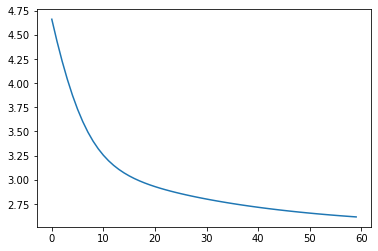

[[ 0.72687112  0.75429157 -0.21696364 -0.16569278]
 [ 0.34898331 -0.52009243  0.32095274 -0.60577937]
 [-0.19009385 -0.26793754  0.15534086 -0.15965528]
 [-0.12723124 -0.12502822 -0.14904676  0.44089132]
 [-0.06822838 -0.41229428 -0.37690469 -0.10598518]
 [-0.29637285  0.16921678 -0.12192903  0.0297392 ]
 [ 0.11071232 -0.33453391  0.34846629  0.01235571]
 [-0.24861544  0.08355018 -0.75132151 -0.3405117 ]]


In [7]:
def gradient_descent(D, Y, lam, iterations):
    theta = initialise(D, Y)
    losses = np.zeros((iterations))
    #YOUR CODE HERE
    for i in range(iterations):
        losses[i] = loss(D, theta, Y)
        theta = gradient_update(D, theta, Y, lam)
    return theta, losses

lam = 0.3 #Learning rate
iterations = 60 #Number of iterations of gradient descent

#For the purposes of doing this assignment, this code isn't really here. Pretend it's engraved in rock.
theta, losses = gradient_descent(D, Y, lam, iterations)
plt.plot(losses)
plt.show()
print(theta)

---